- 1.ASINGURA KANANGA PHILIP	M23B23/004
- 2.Rebecca Alinda	S23B23/056
- 3.Kisa Emmanuel	S23B23/028
- 4.Arapta Hilda Lucky	S23B23/006
- 5.Obba Mark Calvin	S23B23/047


Import the necessary libraies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


To read the excel file we had to install xlrd 

In [36]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


Loading the dataset as 'df'

In [4]:
file_path = "C:/Users/UNETS COMPUTERS/OneDrive/Desktop/Work/Year 2/Data Science/Data science prac/Group4 data Science/Wholesale customers data.xls"
df = pd .read_excel(file_path)
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


- 1 .Checking for normality of all continous variables

array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>]], dtype=object)

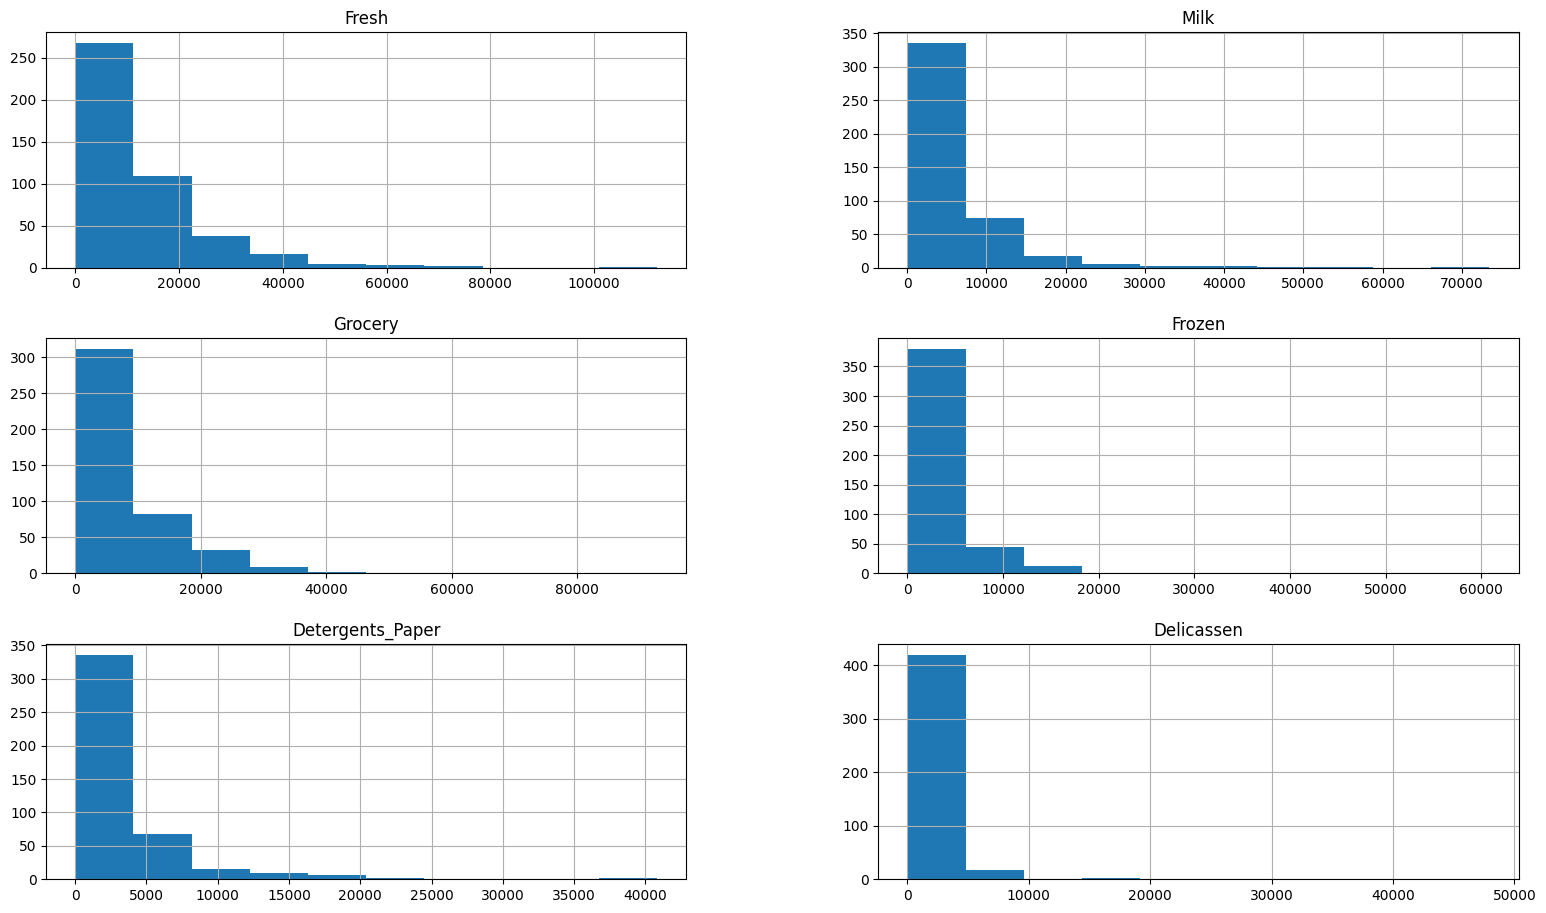

In [12]:
# you can use this aproach
continuous_columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
df.hist(continuous_columns, figsize =(19,11))

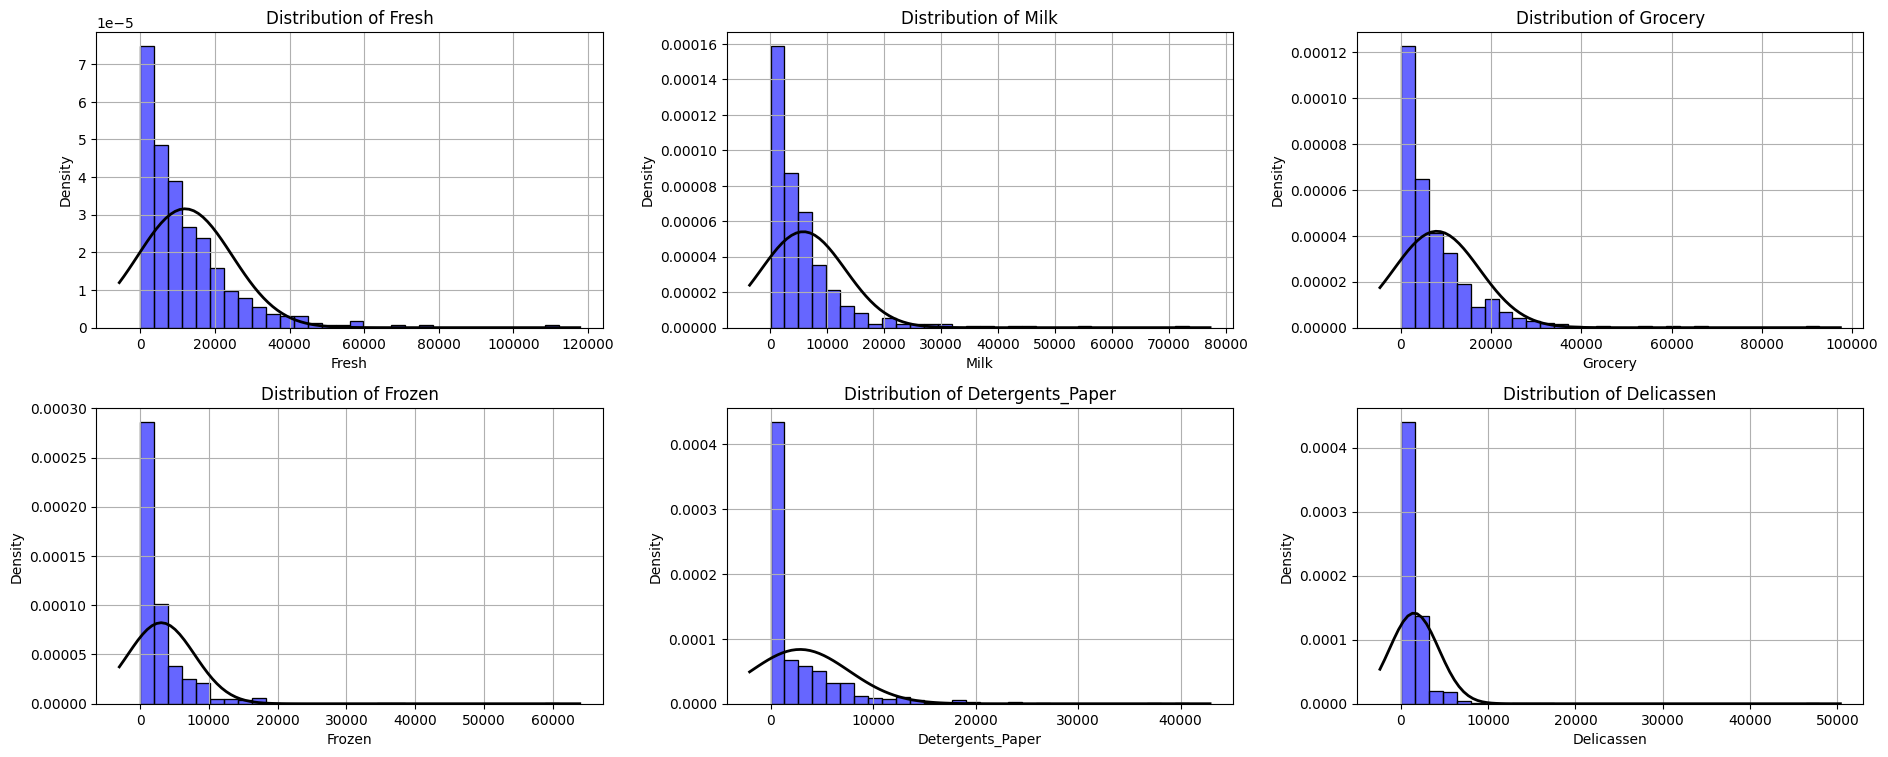

In [13]:


# Select the specified columns
columns_to_plot = continuous_columns

# Set up the matplotlib figure
plt.figure(figsize=(19, 11))

# Loop through the specified columns
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)  # Create a grid of subplots (3 rows, 3 columns)
    
    # Plot the histogram
    sns.histplot(df[column], bins=30, kde=False, stat="density", color='blue', alpha=0.6)
    
    # Overlay the normal distribution
    mu, std = stats.norm.fit(df[column].dropna())  # Fit a normal distribution to the data
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis
    x = np.linspace(xmin, xmax, 100)  # Create a range of values for x
    p = stats.norm.pdf(x, mu, std)  # Calculate the normal distribution PDF
    plt.plot(x, p, 'k', linewidth=2)  # Overlay the normal curve
    
    # Set titles and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


- 2. transforming the Dataset to exclude missing information

In [38]:
#looking into the dataframe
df.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [39]:
#Checking for missing values or data
df.isna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [40]:
#counting the number of missing data
print("Number of missing data in the dataset:\n ", df.isnull().sum())

Number of missing data in the dataset:
  Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


There is no missing information

- 3. Showing the outliers of only the continous variables

<Axes: >

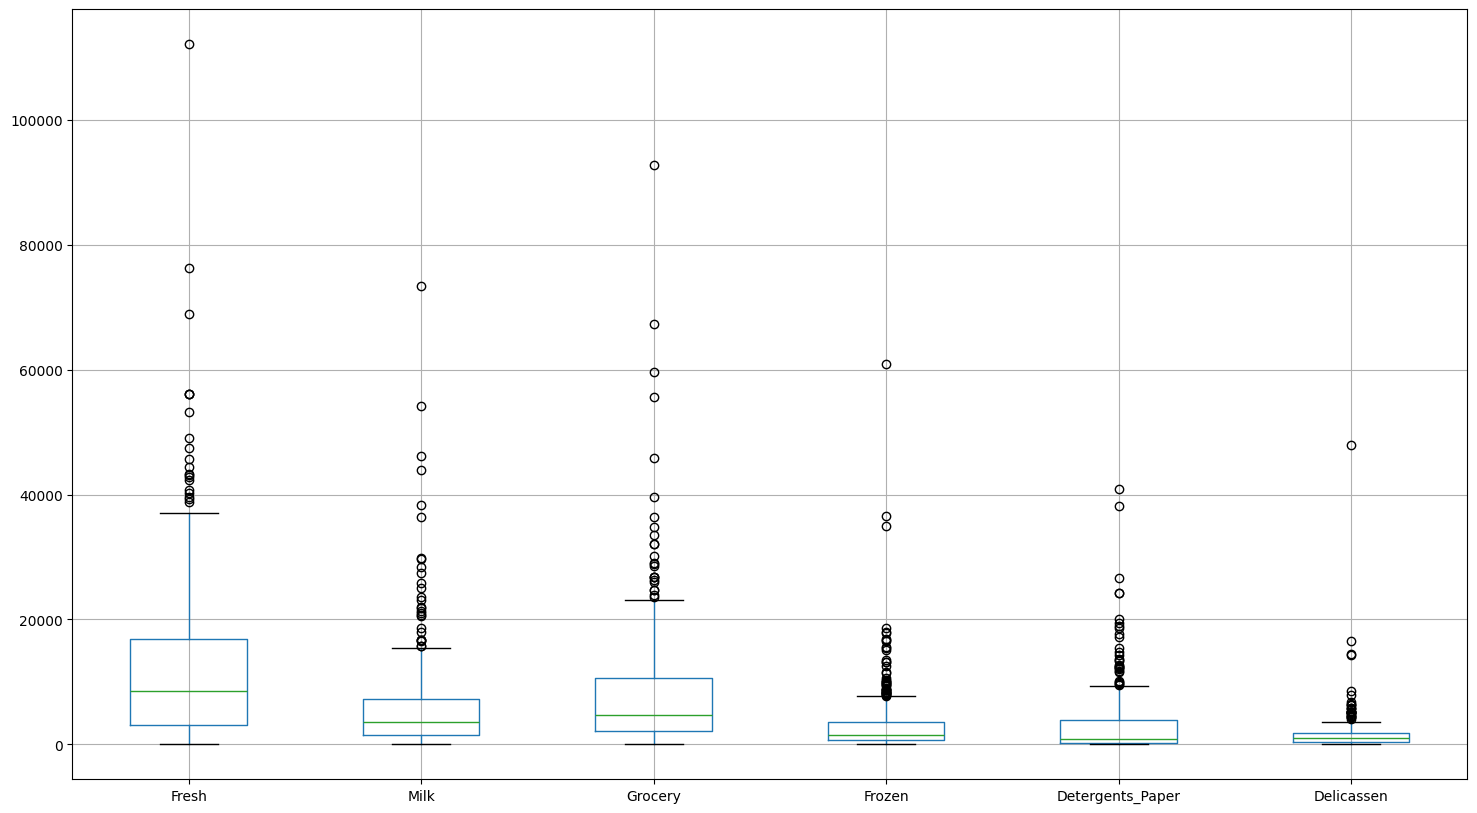

In [17]:
#Visual inspection with boxplots
df.boxplot(continuous_columns,figsize = (18,10))

- Statistical Representation of outliers

In [5]:
# Showing the outliers Statistically

def find_outliers_IQR(data):

   q1=data.quantile(0.25)

   q3=data.quantile(0.75)

   IQR=q3-q1

   is_outlier = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]  
   outliers = data[is_outlier.any(axis=1)]            
   return outliers

In [48]:
#Then use the above function to search and find the total outliers  
outliers = find_outliers_IQR(df[continuous_columns])

print("number of outliers: "+ str(len(outliers)))



outliers


number of outliers: 108


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,6353,8808,7684,2405,3516,7844
4,22615,5410,7198,3915,1777,5185
17,5876,6157,2933,839,370,4478
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
...,...,...,...,...,...,...
427,31012,16687,5429,15082,439,1163
431,8533,5506,5160,13486,1377,1498
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346


- 4. Transforming the dataset and handling the outliers in the continous varibles

In [20]:
# Showing the outliers Statistically

def drop_outliers_IQR(data):

   q1=data.quantile(0.25)

   q3=data.quantile(0.75)

   IQR=q3-q1

   not_outlier = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]  
   dropped_outliers = outliers.dropna()            
   return dropped_outliers

In [21]:
df1 = df.copy()
transformed_data = drop_outliers_IQR(data = df1[continuous_columns])
print(transformed_data)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
2     6353   8808     7684    2405              3516        7844
4    22615   5410     7198    3915              1777        5185
17    5876   6157     2933     839               370        4478
22   31276   1917     4469    9408              2381        4334
23   26373  36423    22019    5154              4337       16523
..     ...    ...      ...     ...               ...         ...
427  31012  16687     5429   15082               439        1163
431   8533   5506     5160   13486              1377        1498
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867

[108 rows x 6 columns]


<Axes: >

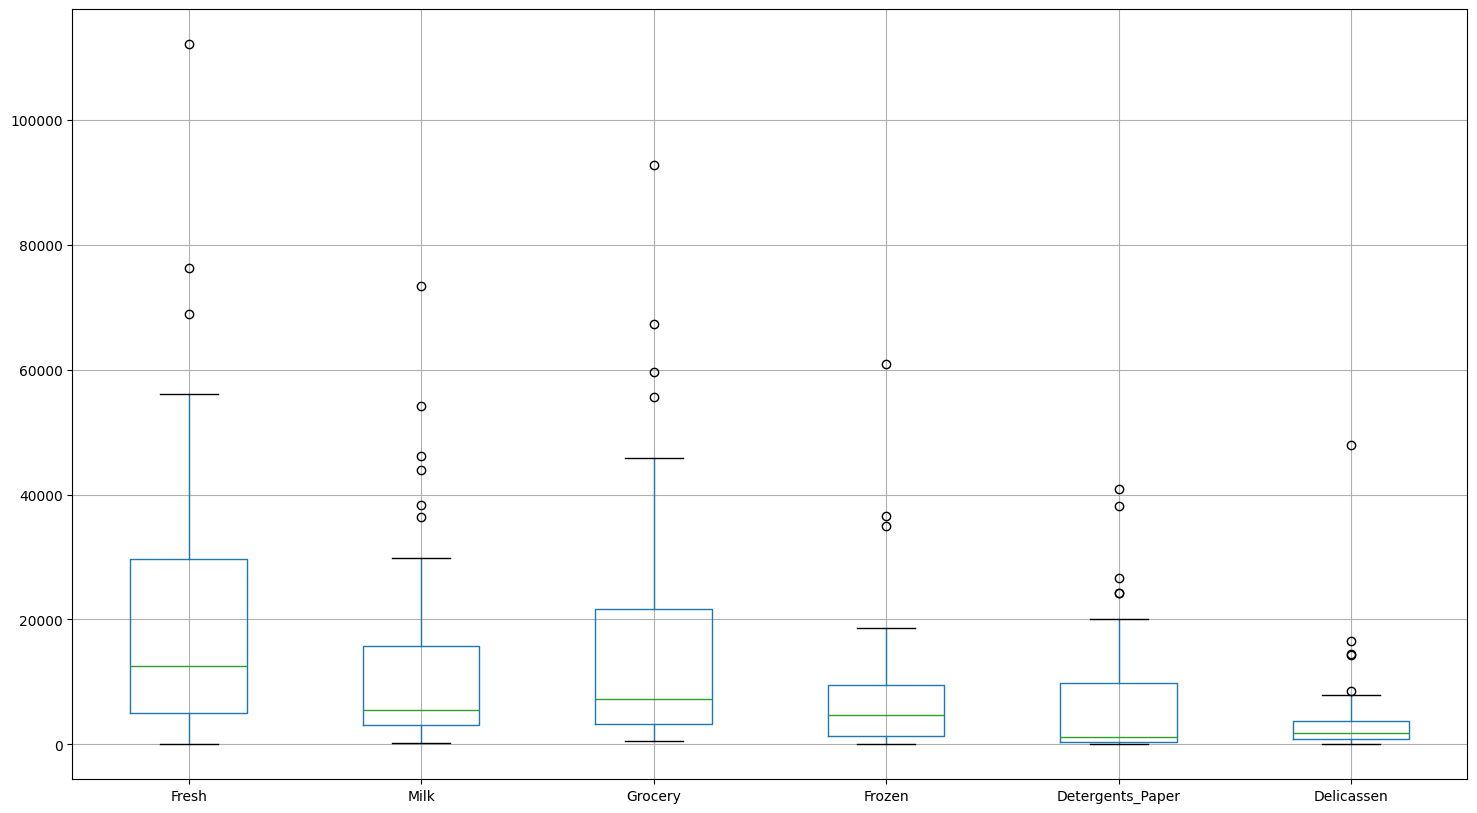

In [22]:
transformed_data.boxplot(continuous_columns,figsize = (18,10))

- Getting the Maximum and Minimum Threshold

In [23]:
outliers = find_outliers_IQR(df1[continuous_columns])

print("max outlier Threshold:\n "+ str(outliers.max()))
print("\n")
print("min outlier Threshold:\n "+ str(outliers.min()))

outliers


max outlier Threshold:
 Fresh               112151
Milk                 73498
Grocery              92780
Frozen               60869
Detergents_Paper     40827
Delicassen           47943
dtype: int64


min outlier Threshold:
 Fresh                 3
Milk                286
Grocery             471
Frozen               33
Detergents_Paper     15
Delicassen            3
dtype: int64


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,6353,8808,7684,2405,3516,7844
4,22615,5410,7198,3915,1777,5185
17,5876,6157,2933,839,370,4478
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
...,...,...,...,...,...,...
427,31012,16687,5429,15082,439,1163
431,8533,5506,5160,13486,1377,1498
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346


- 5. Saving the newly transformed dataset

In [41]:
# new_data = df[["Channel","Region"]].join(transformed_data)
new_data = df[["Channel", "Region"]].reset_index(drop=True).join(transformed_data.reset_index(drop=True))


In [42]:
new_data.to_csv('Group4.csv',index = False)


- 6. Importing the transformed csv file

In [43]:
Assignment1_Group4 = pd.read_csv('Group4.csv')
Assignment1_Group4.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
1,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0
2,2,3,5876.0,6157.0,2933.0,839.0,370.0,4478.0
3,1,3,31276.0,1917.0,4469.0,9408.0,2381.0,4334.0
4,2,3,26373.0,36423.0,22019.0,5154.0,4337.0,16523.0


- 7. The continuous variable that generate the  highest Annual spending

In [44]:
continuous_variables = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
annual_spending = Assignment1_Group4[continuous_variables].sum()
highest_spending = annual_spending.idxmax()
print(f'The variable with the highest annual spending is: {highest_spending}')

The variable with the highest annual spending is: Fresh


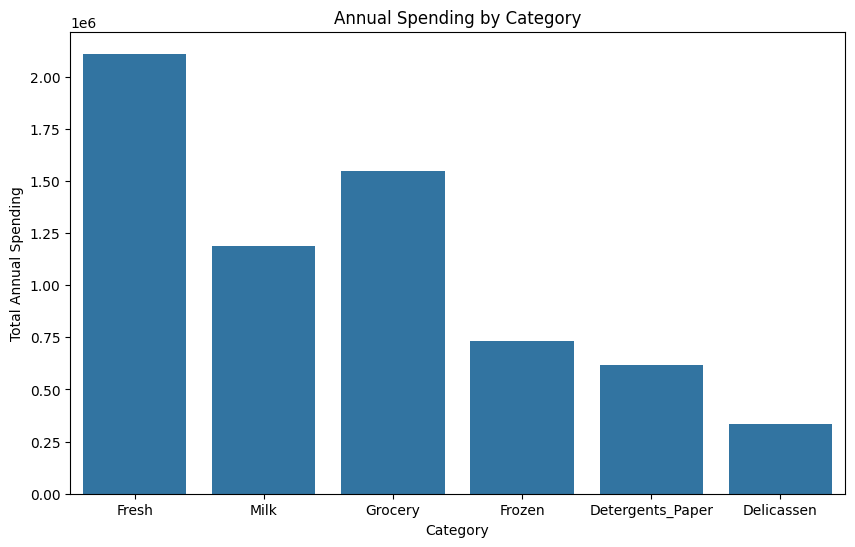

In [28]:
annual_spending = Assignment1_Group4[continuous_variables].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_spending.index, y=annual_spending.values)
plt.title('Annual Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Annual Spending')
highest_spending = annual_spending.idxmax()
highest_value = annual_spending.max()
plt.show()


- 8. Most used retail Channel by Customers

In [45]:
most_used_channel = Assignment1_Group4['Channel'].value_counts().idxmax()
print(f'The most used retail channel is: {most_used_channel}')

The most used retail channel is: 1


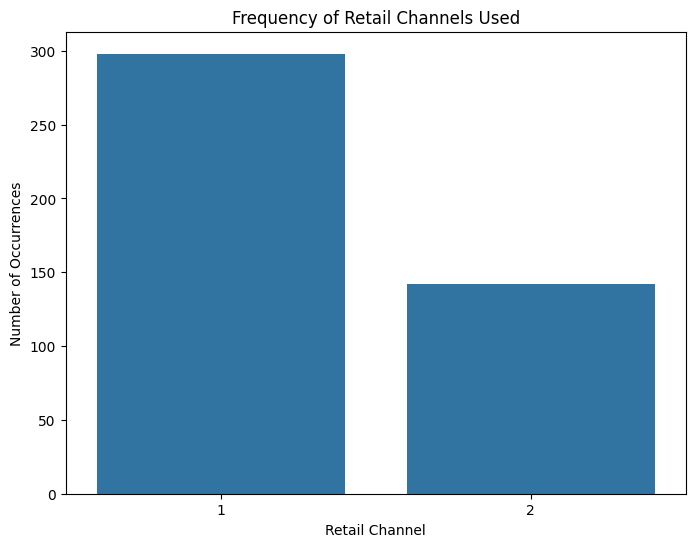

In [49]:

channel_counts = Assignment1_Group4['Channel'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title('Frequency of Retail Channels Used')
plt.xlabel('Retail Channel')
plt.ylabel('Number of Occurrences')
plt.show()



- 9. Region with lowest purchasing power

In [46]:
region_spending = Assignment1_Group4.groupby('Region')[continuous_variables].sum().sum(axis=1)
lowest_region = region_spending.idxmin()
print(f'The region with the lowest purchasing power is: {lowest_region}')


The region with the lowest purchasing power is: 1


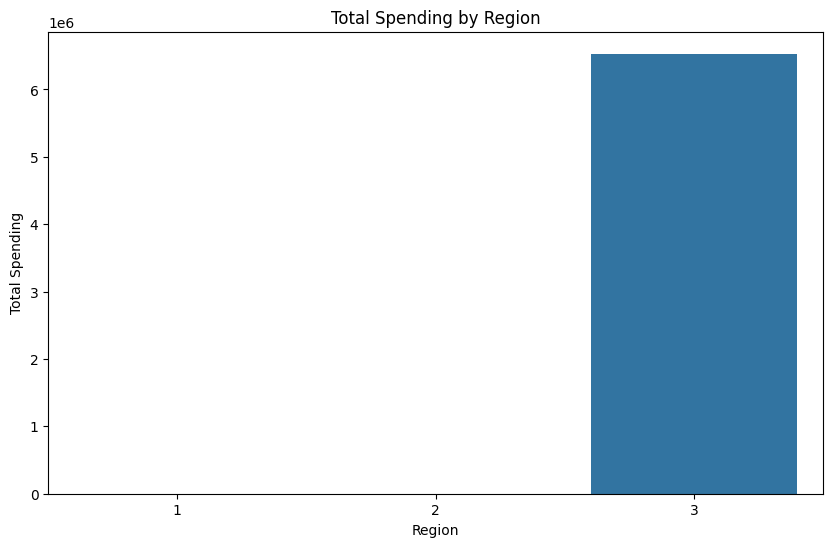

In [32]:
region_spending = Assignment1_Group4.groupby('Region')[continuous_variables].sum().sum(axis=1)
lowest_region = region_spending.idxmin()
lowest_value = region_spending.min()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_spending.index, y=region_spending.values)
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()


- 10. Region which spends the most on milk

In [33]:
#number 10
milk_spending = Assignment1_Group4.groupby('Region')['Milk'].sum()
highest_milk_region = milk_spending.idxmax()
print(f'The region that spends the most on Milk is: {highest_milk_region}')


The region that spends the most on Milk is: 3


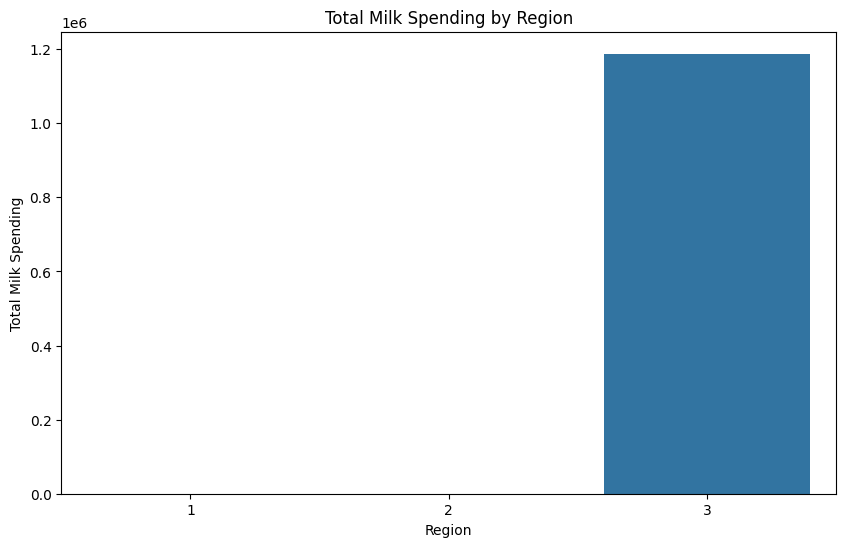

In [34]:

milk_spending = Assignment1_Group4.groupby('Region')['Milk'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=milk_spending.index, y=milk_spending.values)
plt.title('Total Milk Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Milk Spending')
highest_milk_region = milk_spending.idxmax()
highest_milk_value = milk_spending.max()
plt.show()
